In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from data_loader import save_data,load_data  #加载当前目录下的data_loader模块，并调用save_data和load_data方法

Using TensorFlow backend.


In [2]:
# nb_train = 2000
# nb_test = 200
# save_data('cat', nb_train, nb_test) #生成训练数据
# save_data('dog', nb_train, nb_test)

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()  #加载数据，猫标签为1，狗标签为0

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.T)

(4000, 64, 64, 3)
(4000, 1)
(400, 64, 64, 3)
(400, 1)
[[ 1.  1.  1. ...,  0.  0.  0.]]


In [5]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(4000, 12288)

In [6]:
cat_model = Sequential()
cat_model.add(Dense(256, activation='relu', input_shape=(12288,)))
cat_model.add(Dense(128, activation='relu'))
cat_model.add(Dense(64, activation='relu'))
cat_model.add(Dense(32, activation='relu'))
cat_model.add(Dense(16, activation='relu'))
cat_model.add(Dense(1, activation='sigmoid'))

In [7]:
cat_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               3145984   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 3,189,761
Trainable params: 3,189,761
Non-trainable params: 0
_________________________________________________________________


In [8]:
cat_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy']) #二分类

In [9]:
hist = cat_model.fit(x_train, y_train,epochs=30 ,validation_data=(x_test, y_test))

Train on 4000 samples, validate on 400 samples
Epoch 1/30
4000/4000 [==============================] - 15s 4ms/step - loss: 0.7806 - acc: 0.5168 - val_loss: 0.7108 - val_acc: 0.4975
Epoch 2/30
4000/4000 [==============================] - 13s 3ms/step - loss: 0.7045 - acc: 0.5457 - val_loss: 0.6791 - val_acc: 0.5500
Epoch 3/30
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6806 - acc: 0.5782 - val_loss: 0.6986 - val_acc: 0.5375
Epoch 4/30
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6728 - acc: 0.5850 - val_loss: 0.6832 - val_acc: 0.5825
Epoch 5/30
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6665 - acc: 0.5955 - val_loss: 0.6773 - val_acc: 0.5500
Epoch 6/30
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6577 - acc: 0.6052 - val_loss: 0.6821 - val_acc: 0.5525
Epoch 7/30
4000/4000 [==============================] - 12s 3ms/step - loss: 0.6602 - acc: 0.6055 - val_loss: 0.6845 - val_acc: 0.5800
Epoch 8/

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


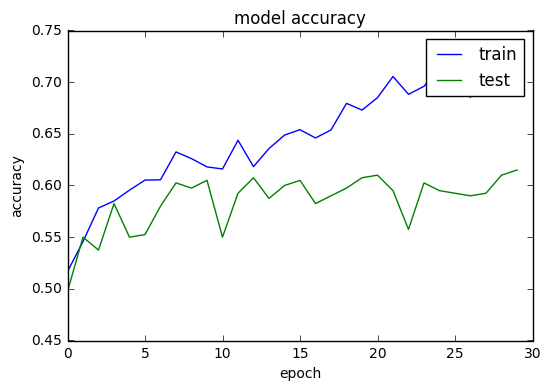

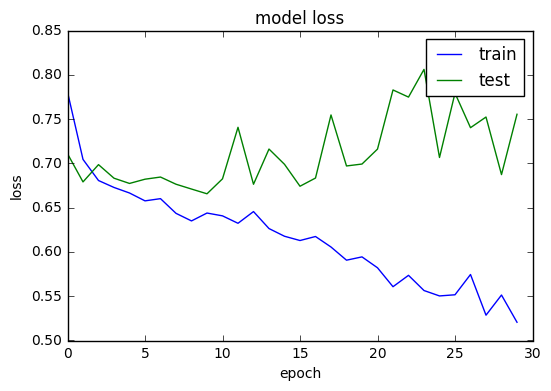

In [10]:
print(hist.history.keys())
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

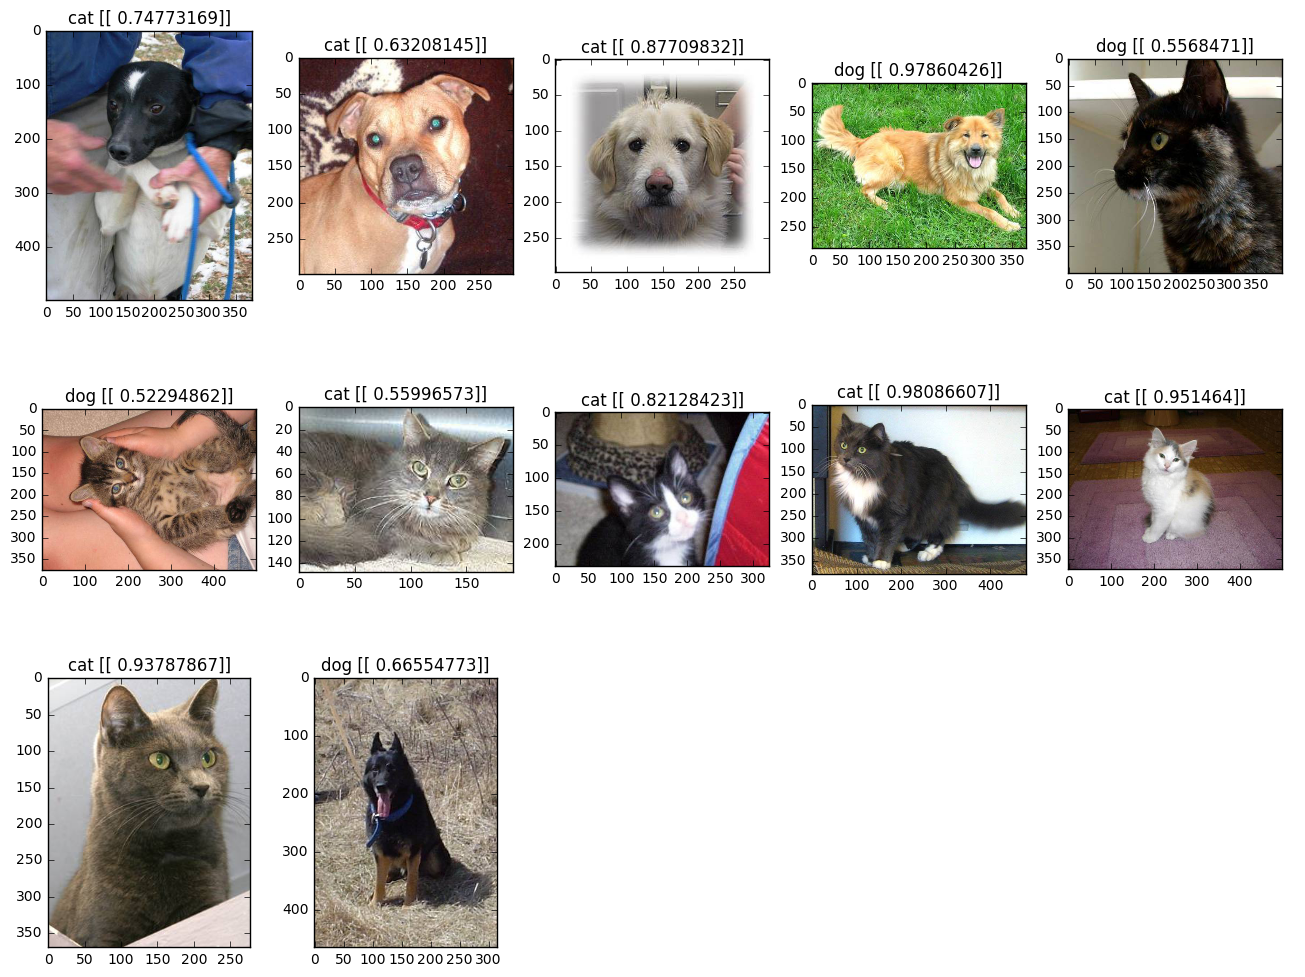

400/400 [==============================] - 0s 635us/step
['loss', 'acc']
loss:  0.755423400402
accuracy:  0.615


In [12]:
from skimage.transform import resize
fig=plt.figure(figsize=(16, 16))
for i in range(1, 13):
    my_image =  'PetImages/images/test/{}.jpg'.format(i)
    my_image = np.array(plt.imread(my_image))
    ax = fig.add_subplot(4, 5, i)
#     plt.subplot(4, 5, i)
    plt.imshow(my_image)
    num_px = 64
    my_image = resize(my_image, (num_px, num_px))
    my_image = my_image.reshape(1, -1) #(1, 12288)
    a = cat_model.predict(my_image)
    if  a > 0.5: #由于猫类对应的标签为1，大于0.5则认为是1
#         plt.title('cat {}'.format(a))
        ax.title.set_text('cat {}'.format(a))
    else:
#         plt.title('dog {}'.format(1 - a))
        ax.title.set_text('dog {}'.format(1 - a))
    
plt.show()
loss, acc = cat_model.evaluate(x_test, y_test)
#模型的测试误差指标
print(cat_model.metrics_names)
print('loss: ',loss)
print('accuracy: ',acc)

In [38]:
import random
from sklearn.model_selection import train_test_split
dataset = np.random.uniform(size=(100,2))
labels = [random.randint(0,1) for _ in range(100)]
print(dataset.shape,type(dataset))
print(labels)
X_train, X_test, y_train, y_test = train_test_split(dataset,labels,test_size=0.25,random_state=46)
print(X_train.shape,X_test.shape)
print(np.shape(y_train),np.shape(y_test))
print(y_test)

(100, 2) <class 'numpy.ndarray'>
[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0]
(75, 2) (25, 2)
(75,) (25,)
[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
